<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(0_4)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.4_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,31.550624,96.827191,53.845245,85.254794,3.545762,281.023616,277.633546,3.390070
1,0.0,1.0,74.393251,42.734809,97.765649,81.230758,-3.170082,302.954385,305.748872,-2.794486
2,0.0,2.0,59.297489,63.996252,77.034237,25.729835,-5.566222,230.491590,236.358201,-5.866611
3,0.0,3.0,76.571705,35.079692,80.797695,55.155693,-3.768031,253.836754,257.675172,-3.838417
4,0.0,4.0,83.247381,74.183606,33.658857,40.661651,-2.519796,239.231700,242.425670,-3.193970
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,72.313437,76.179782,81.307826,46.469954,-0.752709,285.518289,286.679899,-1.161609
119996,999.0,116.0,31.688675,25.414744,23.219725,54.533604,3.050305,147.907054,144.408395,3.498659
119997,999.0,117.0,49.186237,78.127180,99.898480,52.207319,-0.126570,289.292646,289.635022,-0.342376
119998,999.0,118.0,57.437085,27.018286,95.604289,34.746231,0.846296,225.652187,224.982681,0.669507


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    31.550624  96.827191  53.845245  85.254794  3.545762  281.023616   
      1.0    74.393251  42.734809  97.765649  81.230758 -3.170082  302.954385   
      2.0    59.297489  63.996252  77.034237  25.729835 -5.566222  230.491590   
      3.0    76.571705  35.079692  80.797695  55.155693 -3.768031  253.836754   
      4.0    83.247381  74.183606  33.658857  40.661651 -2.519796  239.231700   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  72.313437  76.179782  81.307826  46.469954 -0.752709  285.518289   
      116.0  31.688675  25.414744  23.219725  54.533604  3.050305  147.907054   
      117.0  49.186237  78.127180  99.898480  52.207319 -0.126570  289.292646   
      118.0  57.437085  27.018286  95.604289  34.746231  0.846296  225.652187   
      119.0  66.765062  20.783276  29.409634  27.520957 -1.813263  152.665666   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    277.633546  3.390070  
      1.0    305.748872 -2.794486  
      2.0    236.358201 -5.866611  
      3.0    257.675172 -3.838417  
      4.0    242.425670 -3.193970  
...                 ...       ...  
999.0 115.0  286.679899 -1.161609  
      116.0  144.408395  3.498659  
      117.0  289.635022 -0.342376  
      118.0  224.982681  0.669507  
      119.0  154.489596 -1.823930  

[120000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    31.550624  96.827191  53.845245  85.254794  3.545762  281.023616   
      1.0    74.393251  42.734809  97.765649  81.230758 -3.170082  302.954385   
      2.0    59.297489  63.996252  77.034237  25.729835 -5.566222  230.491590   
      3.0    76.571705  35.079692  80.797695  55.155693 -3.768031  253.836754   
      4.0    83.247381  74.183606  33.658857  40.661651 -2.519796  239.231700   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  72.313437  76.179782  81.307826  46.469954 -0.752709  285.518289   
      116.0  31.688675  25.414744  23.219725  54.533604  3.050305  147.907054   
      117.0  49.186237  78.127180  99.898480  52.207319 -0.126570  289.292646   
      118.0  57.437085  27.018286  95.604289  34.746231  0.846296  225.652187   
      119.0  66.765062  20.783276  29.409634  27.520957 -1.813263  152.665666   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    277.633546  3.390070  
      1.0    305.748872 -2.794486  
      2.0    236.358201 -5.866611  
      3.0    257.675172 -3.838417  
      4.0    242.425670 -3.193970  
...                 ...       ...  
999.0 115.0  286.679899 -1.161609  
      116.0  144.408395  3.498659  
      117.0  289.635022 -0.342376  
      118.0  224.982681  0.669507  
      119.0  154.489596 -1.823930  

[120000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,31.550624,96.827191,53.845245,85.254794,3.545762,281.023616,277.633546,3.390070
1,0.0,1.0,74.393251,42.734809,97.765649,81.230758,-3.170082,302.954385,305.748872,-2.794486
2,0.0,2.0,59.297489,63.996252,77.034237,25.729835,-5.566222,230.491590,236.358201,-5.866611
3,0.0,3.0,76.571705,35.079692,80.797695,55.155693,-3.768031,253.836754,257.675172,-3.838417
4,0.0,4.0,83.247381,74.183606,33.658857,40.661651,-2.519796,239.231700,242.425670,-3.193970
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,72.313437,76.179782,81.307826,46.469954,-0.752709,285.518289,286.679899,-1.161609
119996,999.0,116.0,31.688675,25.414744,23.219725,54.533604,3.050305,147.907054,144.408395,3.498659
119997,999.0,117.0,49.186237,78.127180,99.898480,52.207319,-0.126570,289.292646,289.635022,-0.342376
119998,999.0,118.0,57.437085,27.018286,95.604289,34.746231,0.846296,225.652187,224.982681,0.669507


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    31.550624  96.827191  53.845245  85.254794  3.545762  281.023616   
      1.0    74.393251  42.734809  97.765649  81.230758 -3.170082  302.954385   
      2.0    59.297489  63.996252  77.034237  25.729835 -5.566222  230.491590   
      3.0    76.571705  35.079692  80.797695  55.155693 -3.768031  253.836754   
      4.0    83.247381  74.183606  33.658857  40.661651 -2.519796  239.231700   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  72.313437  76.179782  81.307826  46.469954 -0.752709  285.518289   
      116.0  31.688675  25.414744  23.219725  54.533604  3.050305  147.907054   
      117.0  49.186237  78.127180  99.898480  52.207319 -0.126570  289.292646   
      118.0  57.437085  27.018286  95.604289  34.746231  0.846296  225.652187   
      119.0  66.765062  20.783276  29.409634  27.520957 -1.813263  152.665666   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    277.633546  3.390070  
      1.0    305.748872 -2.794486  
      2.0    236.358201 -5.866611  
      3.0    257.675172 -3.838417  
      4.0    242.425670 -3.193970  
...                 ...       ...  
999.0 115.0  286.679899 -1.161609  
      116.0  144.408395  3.498659  
      117.0  289.635022 -0.342376  
      118.0  224.982681  0.669507  
      119.0  154.489596 -1.823930  

[120000 rows x 8 columns]

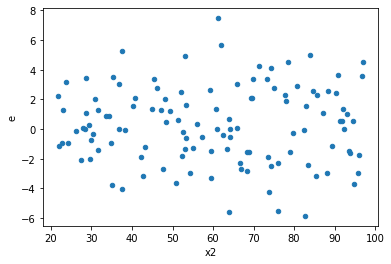

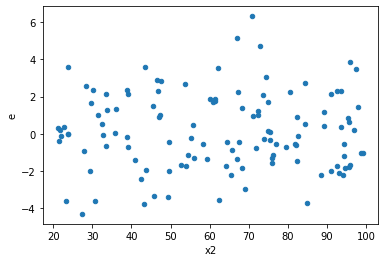

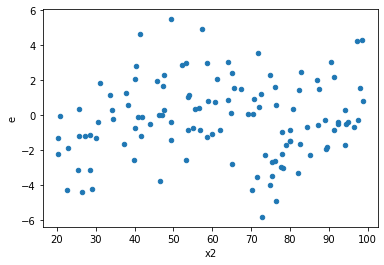

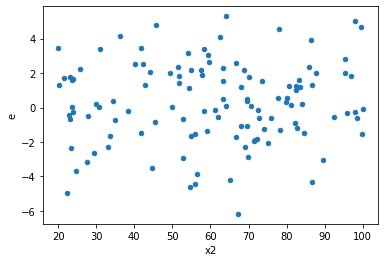

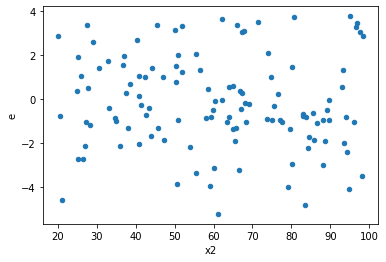

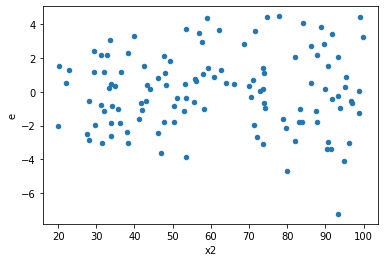

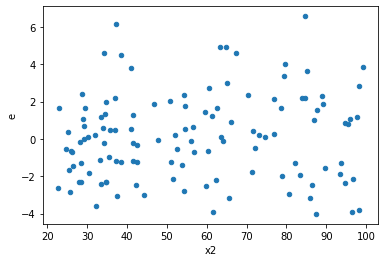

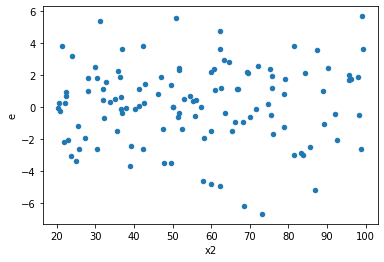

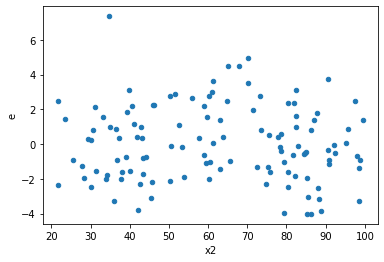

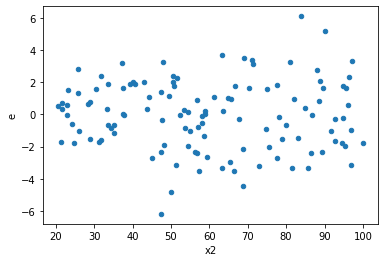

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,63.0,49.0,242.30101873034792,304.3071689603057,3.846047916354729,6.210350386945015,1.6147355732455781,0.08287623032357727,0.9585618848382114,0.041438115161788636,Reject001=1 : Homoscedasticity
5.0,53.0,59.0,197.3297759389934,355.7596076183895,3.723203319603649,6.029823857938805,1.6195258062298636,0.07229832294242833,0.9638508385287858,0.036149161471214164,Reject001=1 : Homoscedasticity
6.0,55.0,57.0,161.6747985890841,414.6585161010866,2.939541792528802,7.274710808790993,2.4747771327084185,0.0008682361604264166,0.9995658819197868,0.0004341180802132083,Reject001=0 : Heteroscedasticity
8.0,50.0,62.0,219.85924423939682,283.13825437527544,4.3971848847879365,4.566746038310894,1.0385612972767087,0.8808894242031222,0.5595552878984389,0.4404447121015611,Reject001=1 : Homoscedasticity
10.0,49.0,63.0,128.11380581560152,283.2082652355968,2.614567465624521,4.495369289453917,1.7193548640674086,0.04290742370015299,0.9785462881499235,0.021453711850076496,Reject001=1 : Homoscedasticity
12.0,68.0,44.0,310.23556158107124,215.32369046875908,4.562287670309871,4.893720237926343,1.07264613535296,0.8143028153038385,0.5928485923480807,0.40715140765191926,Reject001=1 : Homoscedasticity
14.0,49.0,63.0,209.03344691687153,330.3226142578135,4.265988712589214,5.243216099330373,1.2290740676029677,0.43766819843353555,0.7811659007832322,0.21883409921676777,Reject001=1 : Homoscedasticity
17.0,62.0,50.0,278.73784105493013,316.7398512236986,4.495771629918228,6.334797024473972,1.4090566750138047,0.21141612953553612,0.8942919352322319,0.10570806476776806,Reject001=1 : Homoscedasticity
18.0,49.0,63.0,235.05581740045986,342.11866042211557,4.797057497968568,5.430454927335168,1.132038740339224,0.6379049414172848,0.6810475292913576,0.3189524707086424,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,50.0,62.0,358.12424149001237,399.9390090773665,7.162484829800247,6.450629178667202,0.900613311155467,0.7059937345390541,Reject001=1 : Homoscedasticity
1.0,47.0,65.0,200.05610761922986,269.1484734436859,4.25651292806872,4.140745745287475,0.9728023420255952,0.9308679851299722,Reject001=1 : Homoscedasticity
2.0,63.0,49.0,242.30101873034792,304.3071689603057,3.846047916354729,6.210350386945015,1.6147355732455781,0.08287623032357727,Reject001=1 : Homoscedasticity
3.0,57.0,55.0,358.34685424021535,236.4908617981101,6.286786916495006,4.299833850874729,0.6839477634581517,0.15742745862430393,Reject001=1 : Homoscedasticity
4.0,61.0,51.0,276.6459766449129,211.27355974898737,4.535179944998572,4.142618818607596,0.9134408929409966,0.7306218902409368,Reject001=1 : Homoscedasticity
5.0,53.0,59.0,197.3297759389934,355.7596076183895,3.723203319603649,6.029823857938805,1.6195258062298636,0.07229832294242833,Reject001=1 : Homoscedasticity
6.0,55.0,57.0,161.6747985890841,414.6585161010866,2.939541792528802,7.274710808790993,2.4747771327084185,0.0008682361604264166,Reject001=0 : Heteroscedasticity
7.0,36.0,76.0,277.34287031773346,367.1788975209038,7.70396861993704,4.831301283169786,0.6271185049568997,0.12369972716973444,Reject001=1 : Homoscedasticity
8.0,50.0,62.0,219.85924423939682,283.13825437527544,4.3971848847879365,4.566746038310894,1.0385612972767087,0.8808894242031222,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      983
Reject001=0 : Heteroscedasticity     17
Name: Result_test, dtype: int64